<a href="https://colab.research.google.com/github/kumudu12/EN5870/blob/main/Assignment_02_on_Backpropagation%2C_SVM_and_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Stating form x1,1 = 5 and x1,2 = 4 run two iterations of gradient descent with a
learning rate of 0.1. Initialize weights w1 = w2 = 0 and take true output yi = 5
and b = 1. Here, activation function f () is tanh, where f (t) =
exp(t)−exp(−t)
exp(t)+exp(−t)
.
What are the values of the w1 and w2 after two iterations

2. Linear regression is a supervised learning technique used to model the relationship between a set of input features (X) and a target variable (y). Perform linear regression to learn parameters (weight vector) for the given data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

# Data generation
X_train = np.array([[1, 50], [5, 20], [3, 80], [5, 60], [6, 90]]).astype(np.float64)
y_train = np.array([0, 0, 1, 1, 1])
X_test = np.array ([[1 , 40], [5, 10], [2, 60], [6, 65], [7, 50]]).astype(np.float64)
y_test = np.array ([0, 0, 0, 1, 1])


#Create linear regression object
regr = linear_model.LinearRegression()

#Train the model using the training sets
regr.fit(X_train, y_train)

#Make predictions using the testing set
y_pred = regr.predict(X_test)

#The coeffcients
print("Coefficients:  ", regr.coef_)
#The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
#The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

#Plot outputs
#plt.scatter(X_test, y_test, color="black")
#plt.plot(X_test, y_pred, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

Coefficients:   [0.0955414  0.01571125]
Mean squared error: 0.05
Coefficient of determination: 0.78


3.  Train SVM classifier using the training data and predict the output for the testing
data (you may use clf = SVC(kernel=’linear’, random_state=42)
clf.fit(X_train, y_train)). What is the accuracy of the model?

In [3]:
from sklearn import svm

clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

clf_preditions = clf.predict(X_test)
print(accuracy_score(clf_preditions, y_test))

0.6


4. Plot the training data and SVM decision boundary

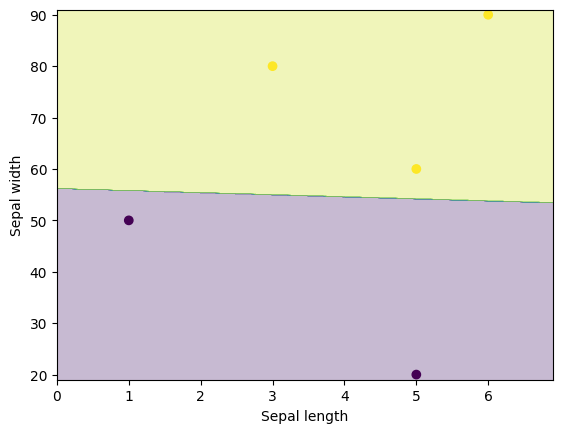

In [4]:
# Define the plotting function
def plot_decision_boundary(clf, X, y):
    # Set the bounds of the plot
    X_train_min, X_train_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_train_min, y_train_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(X_train_min, X_train_max, 0.1),
                         np.arange(y_train_min, y_train_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y, alpha=1)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(clf, X_train, y_train)

5. . Plot the testing data and SVM decision boundary.

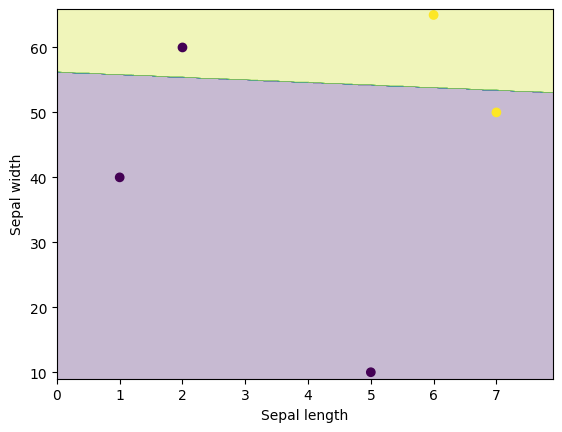

In [5]:
# Define the plotting function
def plot_decision_boundary(clf, X, y):
    # Set the bounds of the plot
    X_test_min, X_test_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_test_min, y_test_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(X_test_min, X_test_max, 0.1),
                         np.arange(y_test_min, y_test_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y, alpha=1)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(clf, X_test, y_test)

6. Scale training and testing data using standard scaler (see listing 2).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


7.  Train SVM classifier using scaled training data and predict the output for the scaled testing data (you may use clf2 = SVC(kernel=’linear’, random_state=42) clf2.fit(X_train_scaled, y_train)). What is the accuracy of the model? Do you see accuracy improvement after feature scaling? What is the reason for this?


In [7]:
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train_scaled, y_train)

clf_preditions = clf.predict(X_test_scaled)
print(accuracy_score(clf_preditions, y_test))

1.0


8.  Plot the training data and SVM decision boundary.


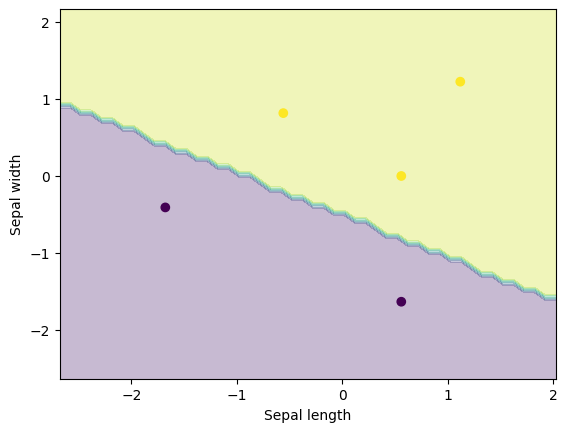

In [8]:
# Define the plotting function
def plot_decision_boundary(clf, X, y):
    # Set the bounds of the plot
    X_train_scaled_min, X_train_scaled_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_train_min, y_train_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(X_train_scaled_min, X_train_scaled_max, 0.1),
                         np.arange(y_train_min, y_train_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y, alpha=1)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(clf, X_train_scaled, y_train)

9. Plot the testing data and SVM decision boundary.


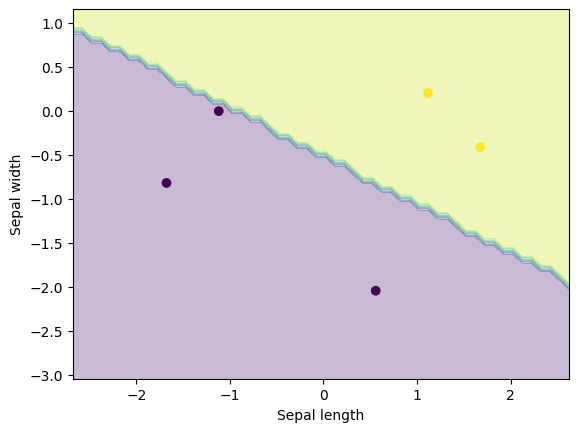

In [9]:
# Define the plotting function
def plot_decision_boundary(clf, X, y):
    # Set the bounds of the plot
    X_test_scaled_min, X_test_scaled_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
    y_test_min, y_test_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(X_test_scaled_min, X_test_scaled_max, 0.1),
                         np.arange(y_test_min, y_test_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y, alpha=1)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(clf, X_test_scaled, y_test)

10.  Plot the scaled training data and SVM decision boundary.

11.  Plot the scaled testing data and SVM decision boundary.

12. Comment on the distance from the support vectors to the decision boundary before and after feature scaling.
See SVM implementation using sklearn

13. Load the iris data set using the code given in listing 3


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# import some data to play with
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Selectonly ' setosa' and 'vertical' or classes
selected_classes = ['virginica', 'versicolor']
filtered_df = iris_df[iris_df['species'].isin(selected_classes)]
y= filtered_df['species']

# Create a label encoder
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)
filtered_df = filtered_df.drop(columns=['petal length (cm)', 'sepal width (cm)', 'petal width (cm)', 'species'])
X= filtered_df

# Split the data in to training and testingsets
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size =0.25 , random_state=22)


14. Carry out logistic regression on the IRIS dataset selecting only classes virginica and versicolor and feature sepal_length.

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.68


15.  Carry out kNN Classifier on the IRIS dataset selecting only classes virginica and versicolor and feature sepal_length. Here, consider three k values as k = 2, k = 9 and k = 25.

In [12]:
#np.random.seed(0)
#X = np.sort(5 * np.random.rand(200, 1), axis=0)  # Increase the number of data points to 200
#T = np.linspace(0, 5, 500)[:, np.newaxis]
#y = np.sin(X).ravel()

# Add noise to targets
#y[::5] += 1 * (0.5 - np.random.rand(40))
k_values = [2, 9, 25]  # List of k values

# Determine the number of rows and columns for subplots
num_rows = len(k_values)
num_cols = 2

plt.figure(figsize=(10, 7))  # Adjust figure size as needed

for k in k_values:
    for i, weights in enumerate(["uniform", "distance"]):
        knn = neighbors.KNeighborsRegressor(k, weights=weights)
        y_ = knn.fit(X, y)

        subplot_index = i + 1 + (num_cols * k_values.index(k))
        plt.subplot(num_rows, num_cols, subplot_index)
        plt.scatter(X, y, color="darkorange", label="data")
        plt.plot(T, y_, color="navy", label="prediction")
        plt.axis("tight")
        plt.legend()
        plt.title("kNN (k = %i, weights = '%s')" % (k, weights))

plt.tight_layout()
plt.show()

NameError: ignored

<Figure size 1000x700 with 0 Axes>

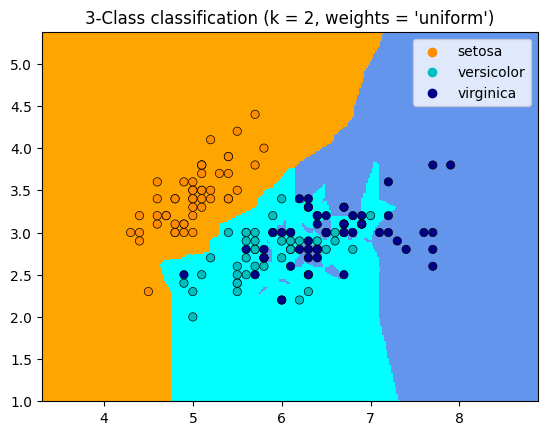

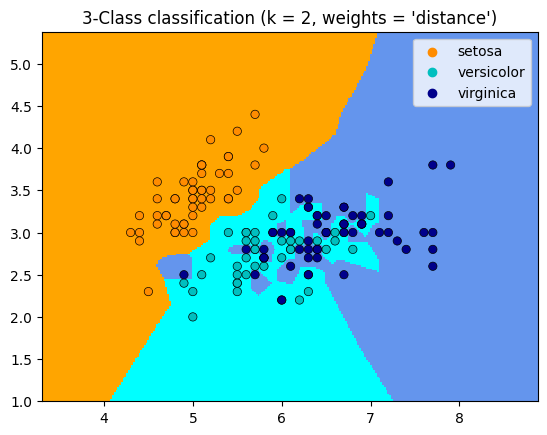

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import datasets, neighbors

n_neighbors = 2

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # Create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
         y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

16. What is the impact of the k value in kNN Classifier for the accuracy of the prediction. Are we able to outperforms logistic regression? If so, what is the reason?